In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
movies=pd.read_csv('./datos/movies.dat', sep='::', encoding='latin-1', engine='python', header=None, names=['movieId', 'title', 'genres'] )
ratings=pd.read_csv('./datos/ratings.dat',sep='::', encoding='latin-1', engine='python', header=None, names=['userId', 'movieId', 'rating','timestamp'])
users=pd.read_csv('./datos/users.dat',sep='::', encoding='latin-1', engine='python', header=None, names=['userId', 'gender', 'age','occupation','zip-code'])

# Análisis de los datos en busca de problemas de validez o integridad

In [39]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [40]:
users.head()

,userId,gender,age,occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [41]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [42]:
# En primer lugar vamos definir una función que nos ayudará a analizar las columnas de un dataframe
def describe_columna(df, col):
    print(f'Columna: {col}  -  Tipo de datos: {df[col].dtype}')
    print(f'Número de valores nulos: {df[col].isnull().sum()}  -  Número de valores distintos: {df[col].nunique()}')
    print('Valores más frecuentes:')
    for i, v in df[col].value_counts().iloc[:10].items() :
        print(i, '\t', v)

In [43]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  3883 non-null   int64 
 1   title    3883 non-null   object
 2   genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [44]:
movies.describe()

,movieId
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [45]:
movies.describe(include='object')

,title,genres
count,3883,3883
unique,3883,301
top,Toy Story (1995),Drama
freq,1,843


In [46]:
describe_columna(movies,'movieId')

Columna: movieId  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 3883
Valores más frecuentes:
1 	 1
2677 	 1
2649 	 1
2650 	 1
2651 	 1
2652 	 1
2653 	 1
2654 	 1
2655 	 1
2656 	 1


In [47]:
describe_columna(movies,'title')

Columna: title  -  Tipo de datos: object
Número de valores nulos: 0  -  Número de valores distintos: 3883
Valores más frecuentes:
Toy Story (1995) 	 1
Buena Vista Social Club (1999) 	 1
Son of Frankenstein (1939) 	 1
Ghost of Frankenstein, The (1942) 	 1
Frankenstein Meets the Wolf Man (1943) 	 1
Curse of Frankenstein, The (1957) 	 1
Son of Dracula (1943) 	 1
Wolf Man, The (1941) 	 1
Howling II: Your Sister Is a Werewolf (1985) 	 1
Tarantula (1955) 	 1


In [48]:
describe_columna(movies,'genres')

Columna: genres  -  Tipo de datos: object
Número de valores nulos: 0  -  Número de valores distintos: 301
Valores más frecuentes:
Drama 	 843
Comedy 	 521
Horror 	 178
Comedy|Drama 	 162
Comedy|Romance 	 142
Drama|Romance 	 134
Documentary 	 116
Thriller 	 101
Action 	 65
Drama|Thriller 	 63


In [49]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   userId      6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [50]:
users.describe()

,userId,age,occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [51]:
users.describe(include='object')

,gender,zip-code
count,6040,6040
unique,2,3439
top,M,48104
freq,4331,19


In [52]:
describe_columna(users,'userId')

Columna: userId  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 6040
Valores más frecuentes:
1 	 1
4024 	 1
4033 	 1
4032 	 1
4031 	 1
4030 	 1
4029 	 1
4028 	 1
4027 	 1
4026 	 1


In [53]:
describe_columna(users,'gender')

Columna: gender  -  Tipo de datos: object
Número de valores nulos: 0  -  Número de valores distintos: 2
Valores más frecuentes:
M 	 4331
F 	 1709


In [54]:
describe_columna(users,'age')

Columna: age  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 7
Valores más frecuentes:
25 	 2096
35 	 1193
18 	 1103
45 	 550
50 	 496
56 	 380
1 	 222


In [55]:
describe_columna(users,'occupation')

Columna: occupation  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 21
Valores más frecuentes:
4 	 759
0 	 711
7 	 679
1 	 528
17 	 502
12 	 388
14 	 302
20 	 281
2 	 267
16 	 241


In [56]:
describe_columna(users,'zip-code')

Columna: zip-code  -  Tipo de datos: object
Número de valores nulos: 0  -  Número de valores distintos: 3439
Valores más frecuentes:
48104 	 19
22903 	 18
55104 	 17
94110 	 17
55455 	 16
55105 	 16
10025 	 16
94114 	 15
55408 	 15
02138 	 15


In [57]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   userId     1000209 non-null  int64
 1   movieId    1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [58]:
ratings.describe()

,userId,movieId,rating,timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [59]:
describe_columna(ratings,'userId')

Columna: userId  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 6040
Valores más frecuentes:
4169 	 2314
1680 	 1850
4277 	 1743
1941 	 1595
1181 	 1521
889 	 1518
3618 	 1344
2063 	 1323
1150 	 1302
1015 	 1286


In [60]:
describe_columna(ratings,'movieId')

Columna: movieId  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 3706
Valores más frecuentes:
2858 	 3428
260 	 2991
1196 	 2990
1210 	 2883
480 	 2672
2028 	 2653
589 	 2649
2571 	 2590
1270 	 2583
593 	 2578


In [61]:
describe_columna(ratings,'rating')

Columna: rating  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 5
Valores más frecuentes:
4 	 348971
3 	 261197
5 	 226310
2 	 107557
1 	 56174


In [62]:
describe_columna(ratings,'timestamp')

Columna: timestamp  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 458455
Valores más frecuentes:
975528402 	 30
975440712 	 28
975527781 	 28
1025585635 	 27
975528243 	 27
975280276 	 26
975528115 	 26
975280390 	 25
1025036288 	 25
974698015 	 24


Los datos de los tres dataframe no parecen presentar ningún problema de integridad o validez. Al analizar las columnas no vemos ningún dato que parezca raro, ni hay nulos en ninguna de las columnas. Vemos que hay 1000208 de rating de 3883 películas realizados por 6040 usuarios

Que no haya ningún nulo en ninguna columna indica que todos los datos han tenido que ser rellenados de forma obligatoria por los usuarios y que siempre tienen que dar una calificación a las películas.

# Preparamos los datasets

In [63]:
#Creamos una columna con la fecha de salida, ya que puede ser útil para analizar los datos
movies['release_year'] = movies['title'].str.extract(r'\((\d{4})\)')

In [64]:
describe_columna(movies,'release_year')

Columna: release_year  -  Tipo de datos: object
Número de valores nulos: 0  -  Número de valores distintos: 81
Valores más frecuentes:
1996 	 345
1995 	 342
1998 	 337
1997 	 315
1999 	 283
1994 	 257
1993 	 165
2000 	 156
1986 	 104
1992 	 102


In [65]:
#Obtenemos los géneros y las etiquetas
generos = movies['genres'].str.get_dummies('|')

In [66]:
generos

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3880,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3881,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [67]:
#Concatenamos el dataset anterior con el de las películas
movies = pd.concat([movies, generos], axis=1)

In [68]:
movies

,movieId,title,genres,release_year,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,1995,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,2000,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3879,3949,Requiem for a Dream (2000),Drama,2000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3880,3950,Tigerland (2000),Drama,2000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3881,3951,Two Family House (2000),Drama,2000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
#Combinamos el dataset de los ratings con el de las películas
ratings_movies= pd.merge(ratings, movies, how='inner', on='movieId')
ratings_movies.head()

,userId,movieId,rating,timestamp,title,genres,release_year,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,1975,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama,1975,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama,1975,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama,1975,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama,1975,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
#En el caso de usuarios que hayan visto varias veces una película nos quedamos con la media de las puntuaciones que le dieron
ratings_movies_refined = ratings_movies.groupby(by=['userId','title','genres', 'release_year', 'Action', 'Adventure',
       'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'], as_index=False).agg({"rating":"mean"})
ratings_movies_refined.head()

,userId,title,genres,release_year,Action,Adventure,Animation,Children's,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating
0,1,Airplane! (1980),Comedy,1980,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4.0
1,1,Aladdin (1992),Animation|Children's|Comedy|Musical,1992,0,0,1,1,1,0,...,0,0,1,0,0,0,0,0,0,4.0
2,1,Antz (1998),Animation|Children's,1998,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,4.0
3,1,Apollo 13 (1995),Drama,1995,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.0
4,1,Awakenings (1990),Drama,1990,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.0


In [71]:
#Cambiamos el nombre del dataframe para que sea más cómodo de usar
df=ratings_movies_refined


## Análisis gráfico de los datos

**Calificaciones más frecuentes**

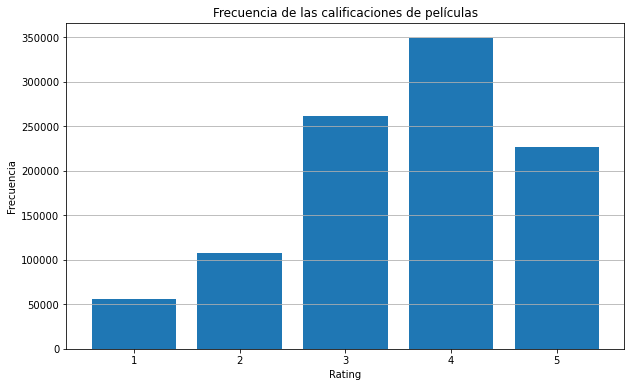

In [72]:
# Obtenemos la frecuencia de cada calificación
ratings_frequency = df['rating'].value_counts().sort_index()

# Creamos una nueva figura con un tamaño específico
plt.figure(figsize=(10, 6))

# Creamos el gráfico de barras
plt.bar(ratings_frequency.index, ratings_frequency.values)

# Agregamos etiquetas y título
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de las calificaciones de películas')
plt.xticks(range(1, 6))  
plt.grid(axis='y') 

# Mostramos el gráfico
plt.show()

Vemos que las calificación más frecuente es el 4 y que la media ronda el 3 con algo.

In [73]:
print("La media de calificaciones es: ", round(df['rating'].mean(),2))

La media de calificaciones es:  3.58


**Número de películas por género**

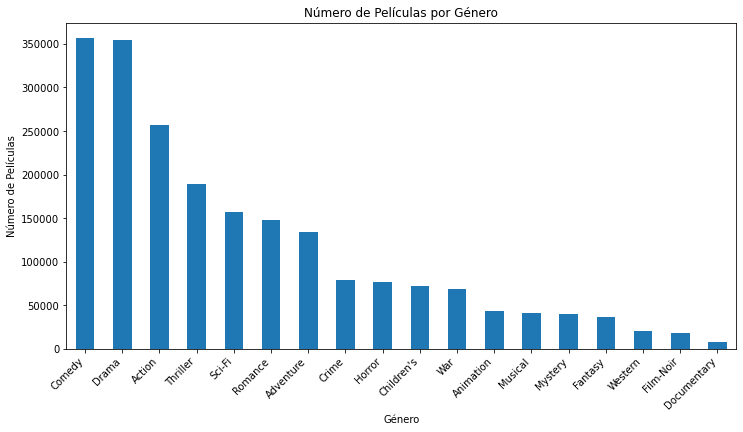

In [74]:
# Obtenemos el recuento de películas por género
movies_by_genre = df.iloc[:, 4:-1].sum()

# Ordenamos los resultados
movies_by_genre=movies_by_genre.sort_values(ascending=False)

# Creamos una nueva figura con un tamaño específico
plt.figure(figsize=(12, 6))

# Creamos el gráfico de barras
movies_by_genre.plot(kind='bar')

# Agregamos etiquetas y título
plt.xlabel('Género')
plt.ylabel('Número de Películas')
plt.title('Número de Películas por Género')

# Rotamos las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostramos el gráfico
plt.show()

Misma información con un diagrama de sectores

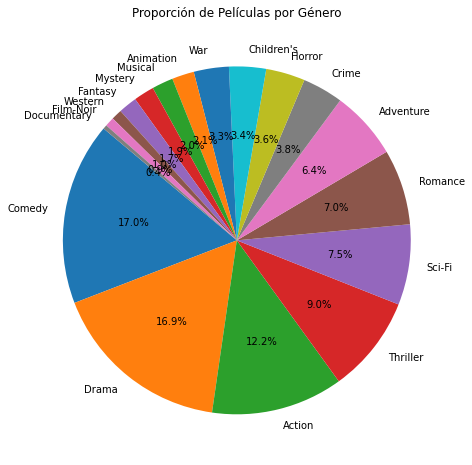

In [75]:
# Obtenemos el recuento de películas por género
movies_by_genre = df.iloc[:, 4:-1].sum()

# Ordenamos los resultados
movies_by_genre=movies_by_genre.sort_values(ascending=False)

# Creamos una nueva figura con un tamaño específico
plt.figure(figsize=(8, 8))

# Creamos el gráfico de pastel
plt.pie(movies_by_genre, labels=movies_by_genre.index, autopct='%1.1f%%', startangle=140)

# Agregamos título
plt.title('Proporción de Películas por Género')

# Mostramos el gráfico
plt.show()

Vemos que los géneros con más películas son comedia, drama, acción y Thriller, mientras que menos películas tienen son Western, cine negro y documental.

**Géneros más votados por los usuarios (películas más vistas por género**

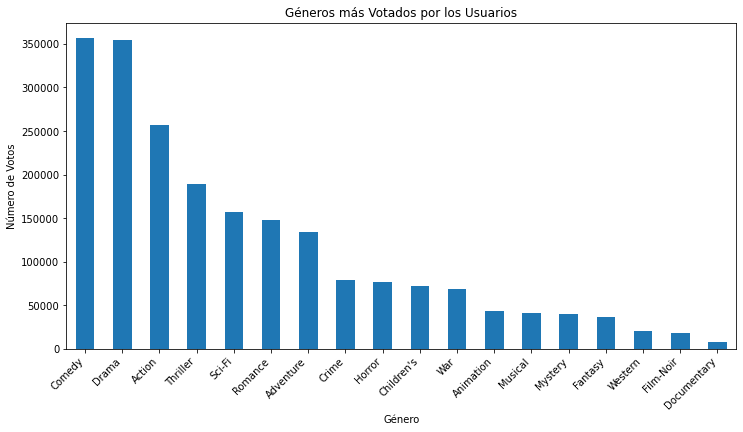

In [76]:
# Sumamos el número de votos para cada género
votes_by_genre = df.iloc[:, 4:-1].sum()

# Ordenamos los géneros por el número de votos en orden descendente
popular_genres = votes_by_genre.sort_values(ascending=False)

# Creamos una nueva figura con un tamaño específico
plt.figure(figsize=(12, 6))

# Creamos el gráfico de barras
popular_genres.plot(kind='bar')

# Agregar etiquetas y título
plt.xlabel('Género')
plt.ylabel('Número de Votos')
plt.title('Géneros más Votados por los Usuarios')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

Misma información con un diagrama de sectores

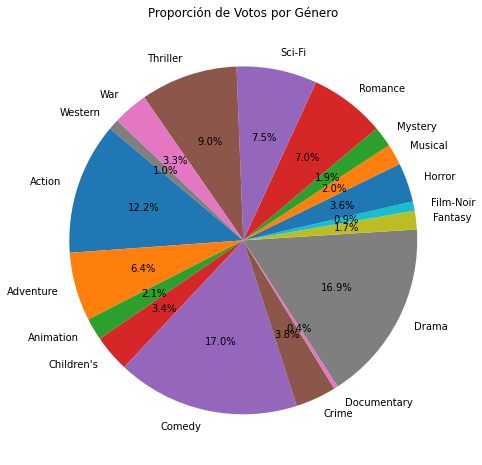

In [77]:
# Sumar el número de votos para cada género
votes_by_genre = df.iloc[:, 4:-1].sum()

# Crear una nueva figura con un tamaño específico
plt.figure(figsize=(8, 8))

# Crear el gráfico de pastel
plt.pie(votes_by_genre, labels=votes_by_genre.index, autopct='%1.1f%%', startangle=140)

# Agregar título
plt.title('Proporción de Votos por Género')

# Mostrar el gráfico
plt.show()

Los géneros más y menos visto por los usuarios coinciden con los que tienen más y menos películas respectivamente.

**Puntuación en función del año de sallida. Agrupadas por década**

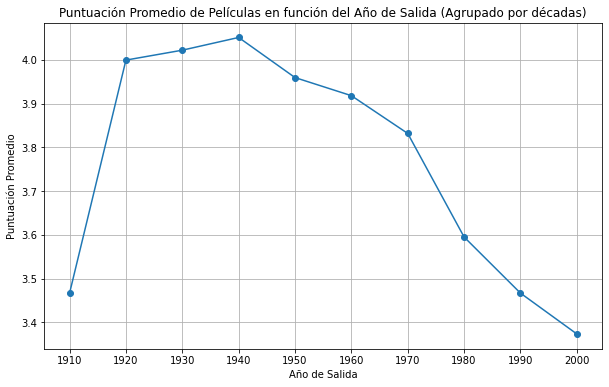

In [78]:
# Cambiamos el tipo de datos del año de salida a entero
df['release_year']=df['release_year'].astype('int')
# Redondear el año de salida al múltiplo de 10 más cercano
df['release_year_group'] = df['release_year'].astype(int) // 10 * 10

# Calculamos la puntuación media para cada grupo de años
average_rating_by_year = df.groupby('release_year_group')['rating'].mean()

# Creamos una nueva figura con un tamaño específico
plt.figure(figsize=(10, 6))

# Creamos el gráfico de línea
plt.plot(average_rating_by_year.index, average_rating_by_year.values, marker='o')

# Agregamos etiquetas y título
plt.xlabel('Año de Salida')
plt.ylabel('Puntuación Promedio')
plt.title('Puntuación Promedio de Películas en función del Año de Salida (Agrupado por décadas)')

# Establecemos los ticks del eje x para cada década
plt.xticks(np.arange(min(average_rating_by_year.index), max(average_rating_by_year.index)+1, 10))

# Mostramos el gráfico
plt.grid(True)
plt.show()

Las películas de la década de 1940 son las que mejor calificación tienen. Desde esa década no ha dejado de bajar la calificación media de las películas.

**Número de películas que han salido cada década**

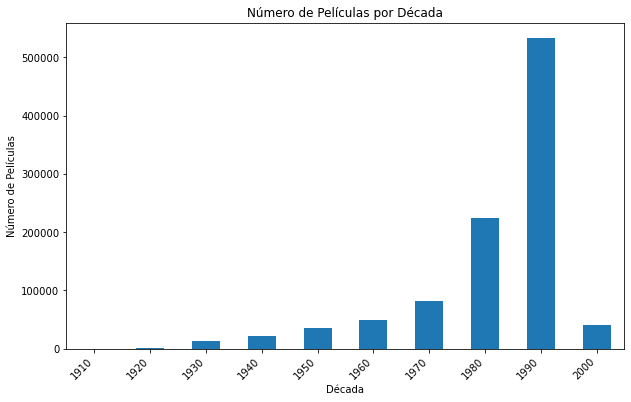

In [79]:
# Redondeamos el año de salida al múltiplo de 10 más cercano
df['release_year_group'] = df['release_year'].astype(int) // 10 * 10

# Contamos el número de películas para cada grupo de años
movies_by_decade = df.groupby('release_year_group').size()

# Creamos una nueva figura con un tamaño específico
plt.figure(figsize=(10, 6))

# Creamos el gráfico de barras
movies_by_decade.plot(kind='bar')

# Agregamos etiquetas y título
plt.xlabel('Década')
plt.ylabel('Número de Películas')
plt.title('Número de Películas por Década')

# Rotamos las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostramos el gráfico
plt.show()

Se puede ver que la década de 1990 es de la que más películas se dispone en el dataset.

**Puntuaciones por género**

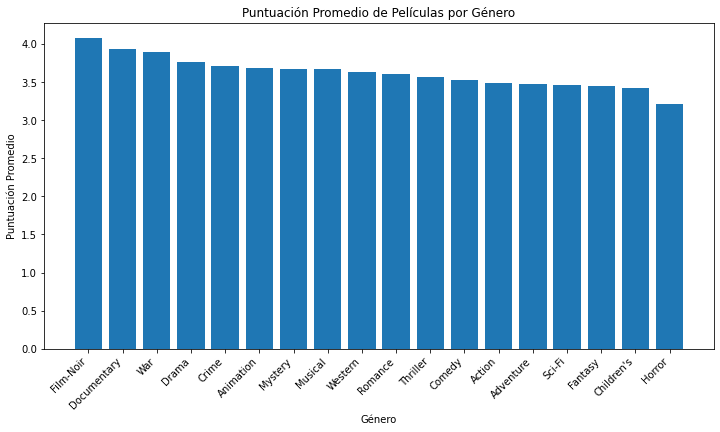

In [81]:
# Calculamos la puntuación promedio para cada género
genre_columns = df.columns[4:22]
average_rating_by_genre = {}
for genre in genre_columns:
    average_rating_by_genre[genre] = df[df[genre] == 1]['rating'].mean()

# Convertimos el diccionario en una lista de tuplas
genre_rating_tuples = list(average_rating_by_genre.items())

# Ordenamos la lista de tuplas por el valor de la nota media en orden descendente
genre_rating_tuples.sort(key=lambda x: x[1], reverse=True)

# Desempaquetamos la lista de tuplas en listas separadas de géneros y notas medias
genres, ratings = zip(*genre_rating_tuples)

# Creamos una nueva figura con un tamaño específico
plt.figure(figsize=(12, 6))

# Creamos el gráfico de barras
plt.bar(genres, ratings)

# Agregamos etiquetas y título
plt.xlabel('Género')
plt.ylabel('Puntuación Promedio')
plt.title('Puntuación Promedio de Películas por Género')

# Rotamos las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostramos el gráfico
plt.show()

La puntuación promedio de las películas en función de su género es bastante similar. Los dos géneros que presentan una mejor puntuación promedio son las de género cine negro y documental. 

Curiosamente, estos son dos de los géneros que presentan un menor número de películas y que son menos vistos por los usuarios. Esto puede indicar que la puntuación algo más alta a la media se puede deber a que la muestra es demasiado pequeña para promorcionar un análisis válido de todos los géneros.

## Recomendador basado en popularidad

In [111]:
# Creamos el dataframe en el que aparecen las películas más populares, 
# calculando el número de puntuaciones y la media de las mismas para cada película
popular_movies = df.groupby('title').agg({'rating': ['count', 'mean']})

# Restablecemos los nombres de las columnas para mayor claridad
popular_movies.columns = ['num_ratings', 'average_rating']

# Ordenamos por número de visualizaciones en orden descendente
popular_movies = popular_movies.sort_values(by='num_ratings', ascending=False)

popular_movies.head(5)

,num_ratings,average_rating
title,,
American Beauty (1999),3428,4.317386
Star Wars: Episode IV - A New Hope (1977),2991,4.453694
Star Wars: Episode V - The Empire Strikes Back (1980),2990,4.292977
Star Wars: Episode VI - Return of the Jedi (1983),2883,4.022893
Jurassic Park (1993),2672,3.763847


Creamos una función que me recomienda las x películas con mejor calificación que han sido puntuadas por al menos un número determinado de usuarios

In [113]:
def obtener_peliculas_mejor_calificadas(popular_movies, x, y):
    # Filtramos películas con una calificación media superior a min_rating y más de z visualizaciones
    peliculas_filtradas = popular_movies[(popular_movies['num_ratings'] > y)]
    
    # Ordenar por calificación media en orden descendente
    peliculas_filtradas = peliculas_filtradas.sort_values(by='average_rating', ascending=False)
    
    # Mostrar las primeras x películas
    return peliculas_filtradas.head(x)


In [114]:
#Vamos a probarlo con 10, 100, 500, 1000 y 2000 usuarios, obteniendo 10 películas cada vez
print('Resultados para las películas vistas por 10 usuarios')
obtener_peliculas_mejor_calificadas(popular_movies,10,10)

Resultados para las películas vistas por 10 usuarios


,num_ratings,average_rating
title,,
Sanjuro (1962),69,4.608696
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),628,4.560510
"Shawshank Redemption, The (1994)",2227,4.554558
"Godfather, The (1972)",2223,4.524966
"Close Shave, A (1995)",657,4.520548
"Usual Suspects, The (1995)",1783,4.517106
Schindler's List (1993),2304,4.510417
"Wrong Trousers, The (1993)",882,4.507937
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),470,4.491489


In [115]:
print('Resultados para las películas vistas por 100 usuarios')
obtener_peliculas_mejor_calificadas(popular_movies,10,100)

Resultados para las películas vistas por 100 usuarios


,num_ratings,average_rating
title,,
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),628,4.560510
"Shawshank Redemption, The (1994)",2227,4.554558
"Godfather, The (1972)",2223,4.524966
"Close Shave, A (1995)",657,4.520548
"Usual Suspects, The (1995)",1783,4.517106
Schindler's List (1993),2304,4.510417
"Wrong Trousers, The (1993)",882,4.507937
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),470,4.491489
Raiders of the Lost Ark (1981),2514,4.477725


In [116]:
print('Resultados para las películas vistas por 500 usuarios')
obtener_peliculas_mejor_calificadas(popular_movies,10,500)

Resultados para las películas vistas por 500 usuarios


,num_ratings,average_rating
title,,
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),628,4.560510
"Shawshank Redemption, The (1994)",2227,4.554558
"Godfather, The (1972)",2223,4.524966
"Close Shave, A (1995)",657,4.520548
"Usual Suspects, The (1995)",1783,4.517106
Schindler's List (1993),2304,4.510417
"Wrong Trousers, The (1993)",882,4.507937
Raiders of the Lost Ark (1981),2514,4.477725
Rear Window (1954),1050,4.476190


In [119]:
print('Resultados para las películas vistas por 1000 usuarios')
obtener_peliculas_mejor_calificadas(popular_movies,10,1000)

Resultados para las películas vistas por 1000 usuarios


,num_ratings,average_rating
title,,
"Shawshank Redemption, The (1994)",2227,4.554558
"Godfather, The (1972)",2223,4.524966
"Usual Suspects, The (1995)",1783,4.517106
Schindler's List (1993),2304,4.510417
Raiders of the Lost Ark (1981),2514,4.477725
Rear Window (1954),1050,4.476190
Star Wars: Episode IV - A New Hope (1977),2991,4.453694
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963),1367,4.449890
Casablanca (1942),1669,4.412822


In [118]:
print('Resultados para las películas vistas por 2000 usuarios')
obtener_peliculas_mejor_calificadas(popular_movies,10,2000)

Resultados para las películas vistas por 2000 usuarios


,num_ratings,average_rating
title,,
"Shawshank Redemption, The (1994)",2227,4.554558
"Godfather, The (1972)",2223,4.524966
Schindler's List (1993),2304,4.510417
Raiders of the Lost Ark (1981),2514,4.477725
Star Wars: Episode IV - A New Hope (1977),2991,4.453694
"Sixth Sense, The (1999)",2459,4.406263
"Silence of the Lambs, The (1991)",2578,4.351823
Saving Private Ryan (1998),2653,4.337354
American Beauty (1999),3428,4.317386


Conforme más usuarios hayan evaluado una película mejores serán las recomendaciones del recomendador basado en popularidad, lo cual hace difícil que películas nuevas o que no son muy conocidas sean recomendadas. 

Por lo tanto, intentando tomar un camino intermedio entre recomendar películas que hayan sido puntuadas por bastantes usuarios para tener seguridad de que la nota está ponderada y no que películas relativamente poco conocidas o nuevas puedan acabar siendo recomendadas, para el resto de pruebas que se hagan se consideraran sólo las películas que hayan sido puntuadas por 500 usuarios.

# Recomendación de popularidad por género

Vamos a construir una función como la anterior, pero en la que podamos elegir el género de la pelicula

In [120]:
#Combinamos el dataset de películas más populares con el de películas para tener acceso al género
popular_movies_genre=pd.merge(popular_movies,movies,how='inner', on='title')
popular_movies_genre=popular_movies_genre[['title','num_ratings','average_rating','genres']]

popular_movies_genre.head(5)

,title,num_ratings,average_rating,genres
0,American Beauty (1999),3428,4.317386,Comedy|Drama
1,Star Wars: Episode IV - A New Hope (1977),2991,4.453694,Action|Adventure|Fantasy|Sci-Fi
2,Star Wars: Episode V - The Empire Strikes Back...,2990,4.292977,Action|Adventure|Drama|Sci-Fi|War
3,Star Wars: Episode VI - Return of the Jedi (1983),2883,4.022893,Action|Adventure|Romance|Sci-Fi|War
4,Jurassic Park (1993),2672,3.763847,Action|Adventure|Sci-Fi


In [92]:
def recomendador_popularidad_por_genero(popular_movies_genre,genero, x, z=500):
    # Filtramos películas por género
    peliculas_genero = popular_movies_genre[popular_movies_genre['genres'].str.contains(genero, case=False)]
    
    # Filtramos películas con una calificación media superior a min_rating y más de z visualizaciones
    peliculas_filtradas = peliculas_genero[(peliculas_genero['num_ratings'] > z)]
    
    # Ordenamos por calificación media en orden descendente
    peliculas_filtradas = peliculas_filtradas.sort_values(by='average_rating', ascending=False)
    
    # Mostramos las primeras x películas
    return peliculas_filtradas.head(x)

Vamos a probar a obtener 10 películas por cada género que tengan al menos 500 puntuaciones

In [93]:
#Acción
print('Peliculas reomcendadas para el género acción')
recomendador_popularidad_por_genero(popular_movies_genre,'Action',10,500)

Peliculas reomcendadas para el género acción


,title,num_ratings,average_rating,genres
470,Seven Samurai (The Magnificent Seven) (Shichin...,628,4.560510,Action|Drama
24,"Godfather, The (1972)",2223,4.524966,Action|Crime|Drama
11,Raiders of the Lost Ark (1981),2514,4.477725,Action|Adventure
1,Star Wars: Episode IV - A New Hope (1977),2991,4.453694,Action|Adventure|Fantasy|Sci-Fi
49,"Godfather: Part II, The (1974)",1692,4.357565,Action|Crime|Drama
5,Saving Private Ryan (1998),2653,4.337354,Action|Drama|War
7,"Matrix, The (1999)",2590,4.315830,Action|Sci-Fi|Thriller
16,"Princess Bride, The (1987)",2318,4.303710,Action|Adventure|Comedy|Romance
205,"Boat, The (Das Boot) (1981)",1001,4.302697,Action|Drama|War
2,Star Wars: Episode V - The Empire Strikes Back...,2990,4.292977,Action|Adventure|Drama|Sci-Fi|War


In [94]:
#Aventuras
print('Peliculas reomcendadas para el género aventuras')
recomendador_popularidad_por_genero(popular_movies_genre,'Adventure',10,500)


Peliculas reomcendadas para el género aventuras


,title,num_ratings,average_rating,genres
11,Raiders of the Lost Ark (1981),2514,4.477725,Action|Adventure
1,Star Wars: Episode IV - A New Hope (1977),2991,4.453694,Action|Adventure|Fantasy|Sci-Fi
294,Lawrence of Arabia (1962),831,4.401925,Adventure|War
400,"Great Escape, The (1963)",696,4.376437,Adventure|War
16,"Princess Bride, The (1987)",2318,4.303710,Action|Adventure|Comedy|Romance
2,Star Wars: Episode V - The Empire Strikes Back...,2990,4.292977,Action|Adventure|Drama|Sci-Fi|War
184,"African Queen, The (1951)",1057,4.251656,Action|Adventure|Romance|War
44,"Wizard of Oz, The (1939)",1718,4.247963,Adventure|Children's|Drama|Musical
55,Indiana Jones and the Last Crusade (1989),1628,4.133292,Action|Adventure
391,Ben-Hur (1959),704,4.110795,Action|Adventure|Drama


In [95]:
#Animación
print('Peliculas reomcendadas para el género animación')
recomendador_popularidad_por_genero(popular_movies_genre,'Animation',10,500)

Peliculas reomcendadas para el género animación


,title,num_ratings,average_rating,genres
443,"Close Shave, A (1995)",657,4.520548,Animation|Comedy|Thriller
267,"Wrong Trousers, The (1993)",882,4.507937,Animation|Comedy
58,Toy Story 2 (1999),1585,4.218927,Animation|Children's|Comedy
29,Toy Story (1995),2077,4.146846,Animation|Children's|Comedy
422,"Iron Giant, The (1999)",674,4.047478,Animation|Children's
232,Fantasia (1940),943,3.904560,Animation|Children's|Musical
182,Beauty and the Beast (1991),1060,3.885849,Animation|Children's|Musical
103,Chicken Run (2000),1329,3.879609,Animation|Children's|Comedy
155,"Lion King, The (1994)",1121,3.860839,Animation|Children's|Musical
47,"Bug's Life, A (1998)",1703,3.854375,Animation|Children's|Comedy


In [96]:
#Infantil
print('Peliculas reomcendadas para el género intantil')
recomendador_popularidad_por_genero(popular_movies_genre,"Childen's",10,500)

Peliculas reomcendadas para el género intantil


,title,num_ratings,average_rating,genres


In [97]:
#Comedia
print('Peliculas reomcendadas para el género comedia')
recomendador_popularidad_por_genero(popular_movies_genre,"Comedy",10,500)

Peliculas reomcendadas para el género comedia


,title,num_ratings,average_rating,genres
443,"Close Shave, A (1995)",657,4.520548,Animation|Comedy|Thriller
267,"Wrong Trousers, The (1993)",882,4.507937,Animation|Comedy
57,Monty Python and the Holy Grail (1974),1599,4.335210,Comedy
143,Life Is Beautiful (La Vita è bella) (1997),1152,4.329861,Comedy|Drama
187,"Sting, The (1973)",1049,4.320305,Comedy|Crime
0,American Beauty (1999),3428,4.317386,Comedy|Drama
16,"Princess Bride, The (1987)",2318,4.303710,Action|Adventure|Comedy|Romance
515,"Philadelphia Story, The (1940)",582,4.300687,Comedy|Romance
293,Some Like It Hot (1959),832,4.300481,Comedy|Crime
487,Cinema Paradiso (1988),615,4.287805,Comedy|Drama|Romance


In [98]:
#Crimen
print('Peliculas reomcendadas para el género crimen')
recomendador_popularidad_por_genero(popular_movies_genre,"Crime",10,500)

Peliculas reomcendadas para el género crimen


,title,num_ratings,average_rating,genres
24,"Godfather, The (1972)",2223,4.524966,Action|Crime|Drama
38,"Usual Suspects, The (1995)",1783,4.517106,Crime|Thriller
557,Double Indemnity (1944),551,4.415608,Crime|Film-Noir
49,"Godfather: Part II, The (1974)",1692,4.357565,Action|Crime|Drama
187,"Sting, The (1973)",1049,4.320305,Comedy|Crime
293,Some Like It Hot (1959),832,4.300481,Comedy|Crime
27,Pulp Fiction (1994),2171,4.278213,Crime|Drama
52,GoodFellas (1990),1657,4.275196,Crime|Drama
592,On the Waterfront (1954),519,4.269750,Crime|Drama
12,Fargo (1996),2513,4.254676,Crime|Drama|Thriller


In [99]:
#Documental
print('Peliculas reomcendadas para el género documental')
recomendador_popularidad_por_genero(popular_movies_genre,"Documentary",10,500)

Peliculas reomcendadas para el género documental


,title,num_ratings,average_rating,genres
382,Hoop Dreams (1994),716,4.188547,Documentary
317,Roger & Me (1989),798,4.073935,Comedy|Documentary


In [100]:
#Drama
print('Peliculas reomcendadas para el género drama')
recomendador_popularidad_por_genero(popular_movies_genre,"Drama",10,500)

Peliculas reomcendadas para el género drama


,title,num_ratings,average_rating,genres
470,Seven Samurai (The Magnificent Seven) (Shichin...,628,4.560510,Action|Drama
23,"Shawshank Redemption, The (1994)",2227,4.554558,Drama
24,"Godfather, The (1972)",2223,4.524966,Action|Crime|Drama
17,Schindler's List (1993),2304,4.510417,Drama|War
240,To Kill a Mockingbird (1962),928,4.425647,Drama
50,Casablanca (1942),1669,4.412822,Drama|Romance|War
43,One Flew Over the Cuckoo's Nest (1975),1725,4.390725,Drama
159,Citizen Kane (1941),1116,4.388889,Drama
234,"Bridge on the River Kwai, The (1957)",938,4.386994,Drama|War
105,North by Northwest (1959),1315,4.384030,Drama|Thriller


In [101]:
#Fantasía
print('Peliculas reomcendadas para el género fantansía')
recomendador_popularidad_por_genero(popular_movies_genre,"Fantasy",10,500)

Peliculas reomcendadas para el género fantansía


,title,num_ratings,average_rating,genres
1,Star Wars: Episode IV - A New Hope (1977),2991,4.453694,Action|Adventure|Fantasy|Sci-Fi
20,E.T. the Extra-Terrestrial (1982),2269,3.965183,Children's|Drama|Fantasy|Sci-Fi
107,Willy Wonka and the Chocolate Factory (1971),1313,3.861386,Adventure|Children's|Comedy|Fantasy
68,Big (1988),1491,3.855801,Comedy|Fantasy
359,Excalibur (1981),742,3.812668,Action|Drama|Fantasy|Romance
520,"20,000 Leagues Under the Sea (1954)",575,3.702609,Adventure|Children's|Fantasy|Sci-Fi
201,Time Bandits (1981),1010,3.694059,Adventure|Fantasy|Sci-Fi
568,Ladyhawke (1985),542,3.673432,Adventure|Fantasy|Romance
503,Peter Pan (1953),594,3.659933,Animation|Children's|Fantasy|Musical
387,"Dark Crystal, The (1982)",710,3.652113,Children's|Fantasy|Sci-Fi


In [102]:
#Terror
print('Peliculas reomcendadas para el género terror')
recomendador_popularidad_por_genero(popular_movies_genre,"Horror",10,500)

Peliculas reomcendadas para el género terror


,title,num_ratings,average_rating,genres
132,Young Frankenstein (1974),1193,4.250629,Comedy|Horror
112,Psycho (1960),1263,4.218527,Horror|Thriller
30,Alien (1979),2024,4.159585,Action|Horror|Sci-Fi|Thriller
171,"Shining, The (1980)",1087,4.104876,Horror
48,Jaws (1975),1697,4.089570,Action|Horror
263,"Exorcist, The (1973)",885,3.955932,Horror
468,Invasion of the Body Snatchers (1956),628,3.912420,Horror|Sci-Fi
26,Ghostbusters (1984),2181,3.905548,Comedy|Horror
366,"Birds, The (1963)",733,3.882674,Horror
561,Evil Dead II (Dead By Dawn) (1987),548,3.826642,Action|Adventure|Comedy|Horror


In [103]:
#Musical
print('Peliculas reomcendadas para el género musical')
recomendador_popularidad_por_genero(popular_movies_genre,"Musical",10,500)

Peliculas reomcendadas para el género musical


,title,num_ratings,average_rating,genres
351,Singin' in the Rain (1952),751,4.283622,Musical|Romance
44,"Wizard of Oz, The (1939)",1718,4.247963,Adventure|Children's|Drama|Musical
158,This Is Spinal Tap (1984),1118,4.179785,Comedy|Drama|Musical
461,My Fair Lady (1964),636,4.154088,Musical|Romance
441,"Producers, The (1968)",658,4.144377,Comedy|Musical
345,West Side Story (1961),761,4.057819,Musical|Romance
98,"Blues Brothers, The (1980)",1341,3.939597,Action|Comedy|Musical
268,"Sound of Music, The (1965)",882,3.931973,Musical
232,Fantasia (1940),943,3.904560,Animation|Children's|Musical
199,Mary Poppins (1964),1011,3.894164,Children's|Comedy|Musical


In [104]:
#Misterio
print('Peliculas reomcendadas para el género misterio')
recomendador_popularidad_por_genero(popular_movies_genre,"Mistery",10,500)

Peliculas reomcendadas para el género misterio


,title,num_ratings,average_rating,genres


In [105]:
#Romántico
print('Peliculas reomcendadas para el género romántico')
recomendador_popularidad_por_genero(popular_movies_genre,"Romance",10,500)

Peliculas reomcendadas para el género romántico


,title,num_ratings,average_rating,genres
50,Casablanca (1942),1669,4.412822,Drama|Romance|War
16,"Princess Bride, The (1987)",2318,4.303710,Action|Adventure|Comedy|Romance
515,"Philadelphia Story, The (1940)",582,4.300687,Comedy|Romance
487,Cinema Paradiso (1988),615,4.287805,Comedy|Drama|Romance
351,Singin' in the Rain (1952),751,4.283622,Musical|Romance
184,"African Queen, The (1951)",1057,4.251656,Action|Adventure|Romance|War
113,"Graduate, The (1967)",1261,4.245837,Drama|Romance
177,Run Lola Run (Lola rennt) (1998),1072,4.224813,Action|Crime|Romance
461,My Fair Lady (1964),636,4.154088,Musical|Romance
100,Annie Hall (1977),1334,4.141679,Comedy|Romance


In [106]:
#Ciencia ficción
print('Peliculas reomcendadas para el género ciencia ficción')
recomendador_popularidad_por_genero(popular_movies_genre,"Sci-Fi",10,500)

Peliculas reomcendadas para el género ciencia ficción


,title,num_ratings,average_rating,genres
1,Star Wars: Episode IV - A New Hope (1977),2991,4.453694,Action|Adventure|Fantasy|Sci-Fi
91,Dr. Strangelove or: How I Learned to Stop Worr...,1367,4.449890,Sci-Fi|War
7,"Matrix, The (1999)",2590,4.315830,Action|Sci-Fi|Thriller
2,Star Wars: Episode V - The Empire Strikes Back...,2990,4.292977,Action|Adventure|Drama|Sci-Fi|War
35,Blade Runner (1982),1800,4.273333,Film-Noir|Sci-Fi
30,Alien (1979),2024,4.159585,Action|Horror|Sci-Fi|Thriller
28,"Terminator, The (1984)",2098,4.152050,Action|Sci-Fi|Thriller
547,"Day the Earth Stood Still, The (1951)",559,4.141324,Drama|Sci-Fi
34,Aliens (1986),1820,4.125824,Action|Sci-Fi|Thriller|War
248,Brazil (1985),913,4.097481,Sci-Fi


In [107]:
#Thriller
print('Peliculas reomcendadas para el género Thriller')
recomendador_popularidad_por_genero(popular_movies_genre,"Thriller",10,500)

Peliculas reomcendadas para el género Thriller


,title,num_ratings,average_rating,genres
443,"Close Shave, A (1995)",657,4.520548,Animation|Comedy|Thriller
38,"Usual Suspects, The (1995)",1783,4.517106,Crime|Thriller
186,Rear Window (1954),1050,4.476190,Mystery|Thriller
13,"Sixth Sense, The (1999)",2459,4.406263,Thriller
105,North by Northwest (1959),1315,4.384030,Drama|Thriller
9,"Silence of the Lambs, The (1991)",2578,4.351823,Drama|Thriller
133,Chinatown (1974),1185,4.339241,Film-Noir|Mystery|Thriller
343,"Manchurian Candidate, The (1962)",765,4.333333,Film-Noir|Thriller
7,"Matrix, The (1999)",2590,4.315830,Action|Sci-Fi|Thriller
254,Vertigo (1958),905,4.272928,Mystery|Thriller


In [108]:
#Bélico
print('Peliculas reomcendadas para el género bélico')
recomendador_popularidad_por_genero(popular_movies_genre,"War",10,500)

Peliculas reomcendadas para el género bélico


,title,num_ratings,average_rating,genres
17,Schindler's List (1993),2304,4.510417,Drama|War
91,Dr. Strangelove or: How I Learned to Stop Worr...,1367,4.449890,Sci-Fi|War
50,Casablanca (1942),1669,4.412822,Drama|Romance|War
294,Lawrence of Arabia (1962),831,4.401925,Adventure|War
234,"Bridge on the River Kwai, The (1957)",938,4.386994,Drama|War
400,"Great Escape, The (1963)",696,4.376437,Adventure|War
5,Saving Private Ryan (1998),2653,4.337354,Action|Drama|War
205,"Boat, The (Das Boot) (1981)",1001,4.302697,Action|Drama|War
2,Star Wars: Episode V - The Empire Strikes Back...,2990,4.292977,Action|Adventure|Drama|Sci-Fi|War
451,Patton (1970),645,4.266667,Drama|War


In [109]:
#Western
print('Peliculas reomcendadas para el género Western')
recomendador_popularidad_por_genero(popular_movies_genre,"Western",10,500)

Peliculas reomcendadas para el género Western


,title,num_ratings,average_rating,genres
80,Butch Cassidy and the Sundance Kid (1969),1419,4.215645,Action|Comedy|Western
299,"Good, The Bad and The Ugly, The (1966)",822,4.133820,Action|Western
207,Unforgiven (1992),997,4.090271,Western
157,Blazing Saddles (1974),1119,4.047364,Comedy|Western
505,Little Big Man (1970),591,4.043993,Comedy|Drama|Western
588,"Fistful of Dollars, A (1964)",522,3.994253,Action|Western
71,Dances with Wolves (1990),1451,3.915231,Adventure|Drama|Western
556,Tombstone (1993),553,3.873418,Western
314,Maverick (1994),802,3.523691,Action|Comedy|Western
389,Legends of the Fall (1994),705,3.425532,Drama|Romance|War|Western
